In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import src.FourCompSlurryModel as FCSM

## Inputs
As per page 30 of The 4-Component Models for Slurry Pipeline Friction and Pump Solids Effect. R.J. Visintainer, © 2022 GIW Industries Inc., Revised 29.July.2022 

In [2]:
D = 0.489   # m
e = 2e-6    # m
mu_s = 0.5  # sliding coef.

Sm = 1.328
Ss = 2.65
Cv = 0.2

Xf = 0.25
Xp = 0.25
Xh = 0.25
Xs = 0.25

Sl = 1  # SG of water
mu_l = 0.001  # viscosity of water @ 20 degC

d50_p = 0.11e-3  # mm -> m
d50_h = 0.68e-3  # mm -> m
ds = 7.33e-3  # mm -> m
d50_s = 12.4e-3  # mm -> m

Vm = 4.5  # m/s - First example, im = 0.06 m/m

## Calculations
### Conversions

In [3]:
Sf = FCSM.Sf(Sl, Xf, Cv, Ss)
Cvf = FCSM.Cvf(Cv, Xf)
Cvs = FCSM.Cvs(Cv, Xs)

### “Carrier Fluid” fraction pressure gradient

In [4]:
mu_f = FCSM.mu_f(mu_l, Cvf)
f_darcy = FCSM.swamee_jain(e, D, Sf, mu_f, Vm)

i_f = FCSM.i_f(Sf, f_darcy, Vm, D)
print(i_f)

0.02430559143838015


Looks to closely align with the graph plotted on pg.30.
### “Pseudo-homogeneous” fraction pressure gradient

In [5]:
Sfp = FCSM.Sfp(Sl, Xf, Xp, Cv, Ss)
A_prime = FCSM.A_prime(Xf, Xp)

delta_i_p = FCSM.i_p(Sfp, Sf, i_f, A_prime)
print(delta_i_p)

0.0011946447981330713


### “Heterogeneous” fraction pressure gradient

In [6]:
V100_s = FCSM.V100_s(D, Ss, Sf)
Vsm_h = FCSM.Vsm(d50_h, D, Ss, Sf, mu_f, e, mu_s)
C_prime = FCSM.C_prime(Xf, Xp, V100_s, Vm, Vsm_h)
Sfph = FCSM.Sfph(Sl, Xf, Xp, Xh, Cv, Ss)

delta_i_h = FCSM.i_h(C_prime, Sfph, Sfp, Sf, Ss, Vm, d50_h, mu_f, mu_s=mu_s)
print(delta_i_h)

0.008164022859209507


Again looks pretty close to the plotted graph.

### “Fully Stratified” fraction pressure gradient

In [7]:
Vsm_s = FCSM.Vsm(ds, D, Ss, Sf, mu_f, e, mu_s)
B_prime = FCSM.B_prime(Xf, Xp, Xh, V100_s, Vm, Vsm_s)

delta_i_s = FCSM.i_s(B_prime, Sfph, Ss, Cvs, Vsm_s, Vm, mu_s=mu_s)
print(delta_i_s)

0.02656736147952727


### Total pressure gradient

In [8]:
i_m = i_f + delta_i_p + delta_i_h + delta_i_s
print(i_m)

0.06023162057525


Ok now lets recreate the graph in the example.

In [9]:
Vm = np.linspace(1.5, 7.5, 100) # re run the calc from 1.5 - 7.5 m/s

# conversions
Sf = FCSM.Sf(Sl, Xf, Cv, Ss)
Cvf = FCSM.Cvf(Cv, Xf)
Cvs = FCSM.Cvs(Cv, Xs)

# “Carrier Fluid” fraction
mu_f = FCSM.mu_f(mu_l, Cvf)
f_darcy = FCSM.swamee_jain(e, D, Sf, mu_f, Vm)
i_f = FCSM.i_f(Sf, f_darcy, Vm, D)

# The “Pseudo-homogeneous” fraction
Sfp = FCSM.Sfp(Sl, Xf, Xp, Cv, Ss)
A_prime = FCSM.A_prime(Xf, Xp)
delta_i_p = FCSM.i_p(Sfp, Sf, i_f, A_prime)

# pressure gradient of the “Heterogeneous” fraction
V100_s = FCSM.V100_s(D, Ss, Sf)
Vsm_h = FCSM.Vsm(d50_h, D, Ss, Sf, mu_f, e, mu_s)
C_prime = FCSM.C_prime(Xf, Xp, V100_s, Vm, Vsm_h)
Sfph = FCSM.Sfph(Sl, Xf, Xp, Xh, Cv, Ss)
delta_i_h = FCSM.i_h(C_prime, Sfph, Sfp, Sf, Ss, Vm, d50_h, mu_f, mu_s=mu_s)

# pressure gradient of the “Fully Stratified” fraction
Vsm_s = FCSM.Vsm(ds, D, Ss, Sf, mu_f, e, mu_s)
B_prime = FCSM.B_prime(Xf, Xp, Xh, V100_s, Vm, Vsm_s)
delta_i_s = FCSM.i_s(B_prime, Sfph, Ss, Cvs, Vsm_s, Vm, mu_s=mu_s)

# TOTAL
i_m = i_f + delta_i_p + delta_i_h + delta_i_s

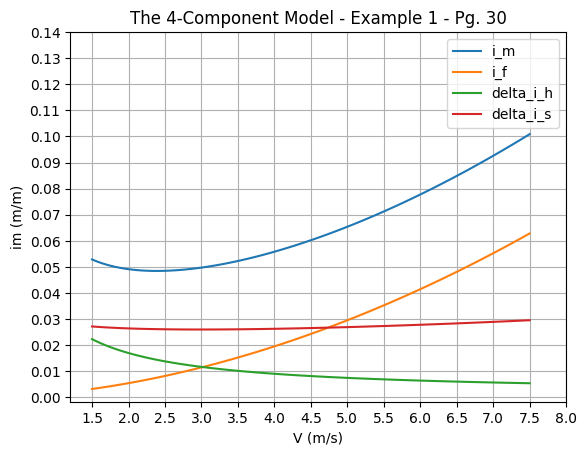

In [10]:
plt.plot(Vm, i_m, label ="i_m")
plt.plot(Vm, i_f, label ="i_f")
plt.plot(Vm, delta_i_h, label ="delta_i_h")
plt.plot(Vm, delta_i_s, label ="delta_i_s")

plt.title("The 4-Component Model - Example 1 - Pg. 30")
plt.xticks(np.arange(min(Vm), max(Vm)+1, 0.5))
plt.yticks(np.arange(0, 0.14, 0.01))
plt.xlabel('V (m/s)')
plt.ylabel('im (m/m)')
plt.grid()
plt.legend()
plt.show()